In [48]:
import numpy as np
import sys 

import pandas as pd
pd.set_option('display.max_columns', None)

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
# !pip install statsmodels - we may need to pip stall statsmodels but should be in the requirements section
#from statsmodels.graphics.gofplots import qqplot

# import the python filesf
from get_data import get_data


import copy

In [62]:
property_metrics_daily_df = pd.read_csv(f'../raw_data/property_metrics_daily.csv')

In [64]:
prop_df = pd.read_csv(f'../raw_data/property.csv')

In [63]:
print(property_metrics_daily_df.columns)

Index(['property_id', 'context_date', 'reported_hlr', 'reported_tth',
       'total_daily_sensor_readings', 'daily_avg_room_humidty',
       'daily_avg_room_temperature', 'daily_avg_weather_temperature',
       'daily_max_target_temperature', 'daily_total_delta_energy_meter_use',
       'daily_total_heating_use', 'reported_fuel_poverty_percentage',
       'daily_temp_below18c_total_sensor_readings', 'hub_type', 'occupied'],
      dtype='object')


### Import the data 

In [49]:
# import the get data
results = get_data()
results.head()

,property_id,hub_id,zone,id,type,occupied,heating_system,heating_system_manufacturer,heating_system_model_no,number_of_zones,occurred,number_of_paired_sensors,lodgement_date,current_energy_efficiency,property_type,built_form,floor_description,windows_description,walls_description,roof_description,number_habitable_rooms,number_heated_rooms,total_floor_area,context_date,reported_hlr,reported_tth,total_daily_sensor_readings,daily_avg_room_humidty,daily_avg_room_temperature,daily_avg_weather_temperature,daily_max_target_temperature,daily_total_delta_energy_meter_use,daily_total_heating_use,reported_fuel_poverty_percentage,daily_temp_below18c_total_sensor_readings,hub_type
0,20222,20128.0,1.0,20891.0,255,True,HEAT_PUMP_GSHP,KENSA,Shoebox,1,04/09/23 15:22,NaN,02/03/21 00:00,46,Flat,Detached,Average thermal transmittance 1.20 W/m-¦K,Fully double glazed,Average thermal transmittance 0.70 W/m-¦K,(other premises above),NaN,NaN,35.0,14/08/20 00:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,20222,20128.0,1.0,20891.0,255,True,HEAT_PUMP_GSHP,KENSA,Shoebox,1,04/09/23 15:22,NaN,02/03/21 00:00,46,Flat,Detached,Average thermal transmittance 1.20 W/m-¦K,Fully double glazed,Average thermal transmittance 0.70 W/m-¦K,(other premises above),NaN,NaN,35.0,02/08/20 00:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,20222,20128.0,1.0,20891.0,255,True,HEAT_PUMP_GSHP,KENSA,Shoebox,1,04/09/23 15:22,NaN,02/03/21 00:00,46,Flat,Detached,Average thermal transmittance 1.20 W/m-¦K,Fully double glazed,Average thermal transmittance 0.70 W/m-¦K,(other premises above),NaN,NaN,35.0,17/08/20 00:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,20222,20128.0,1.0,20891.0,255,True,HEAT_PUMP_GSHP,KENSA,Shoebox,1,04/09/23 15:22,NaN,02/03/21 00:00,46,Flat,Detached,Average thermal transmittance 1.20 W/m-¦K,Fully double glazed,Average thermal transmittance 0.70 W/m-¦K,(other premises above),NaN,NaN,35.0,06/08/20 00:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,20222,20128.0,1.0,20891.0,255,True,HEAT_PUMP_GSHP,KENSA,Shoebox,1,04/09/23 15:22,NaN,02/03/21 00:00,46,Flat,Detached,Average thermal transmittance 1.20 W/m-¦K,Fully double glazed,Average thermal transmittance 0.70 W/m-¦K,(other premises above),NaN,NaN,35.0,16/08/20 00:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


 ### Inspecting the data
 🧭 Exploratory Data Analysis

👥 Remove Duplicates

🤕 Impute or Remove Missing Values

🕵🏻‍♂️ Check for Outliers

📏 Scaling Numerical Features

🏷 One-Hot-Encoder for Categorical Features

👻 Label-Encoder for a Categorical Target

🍰 Feature Engineering will squeeze out better signals for your model to learn feature instead_

🍰 Target Engineering: might be easier to predict a transformed target

☠️ Not all features are our friends. Remove the "noisy" features using Feature Permutation (or VIF Analysis for Linear models)

In [50]:
print(f'This is the shape of our data {results.shape}')

This is the shape of our data (558615, 36)


# Let's get an initial idea of the correlation with the numerical variables

<Axes: >

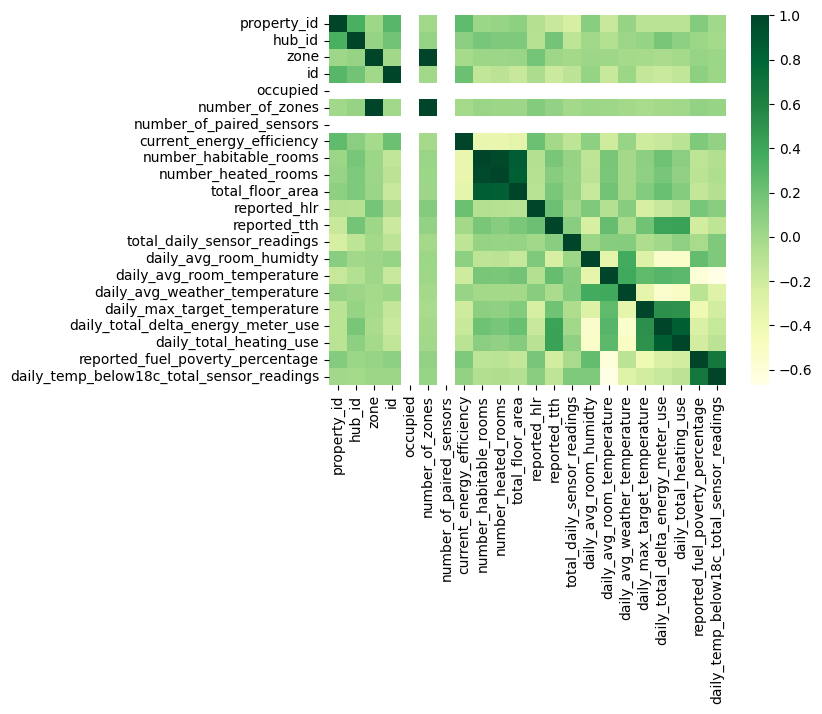

In [51]:
sns.heatmap(results.select_dtypes(exclude = 'object').corr(),cmap = 'YlGn')

In [59]:
corr_df = results.select_dtypes(exclude = 'object').corr()
corr_df = corr_df.stack().reset_index().rename(columns ={'level_0':'Feature 1', 'level_1': 'Feature 2', 0:'Correlation'}).sort_values(by ='Correlation', ascending = False)
corr_df[corr_df['Feature 1'] != corr_df['Feature 2']]

,Feature 1,Feature 2,Correlation
44,zone,number_of_zones,1.000000
82,number_of_zones,zone,1.000000
127,number_habitable_rooms,number_heated_rooms,0.969959
146,number_heated_rooms,number_habitable_rooms,0.969959
166,total_floor_area,number_habitable_rooms,0.855229
...,...,...,...
334,daily_total_delta_energy_meter_use,daily_avg_weather_temperature,-0.546375
373,reported_fuel_poverty_percentage,daily_avg_room_temperature,-0.599158
278,daily_avg_room_temperature,reported_fuel_poverty_percentage,-0.599158
393,daily_temp_below18c_total_sensor_readings,daily_avg_room_temperature,-0.669110


In [53]:
abs_corr_df = corr_df.copy()
abs_corr_df['Correlation'] = abs(abs_corr_df['Correlation'])

In [54]:
unneccesary_features= ['daily_total_heating_use','daily_total_delta_energy_meter_use','zone','id','hub_id','property_id','number_of_zones','total_daily_sensor_readings']
letter_col = ['a','b','c','d','e','f','g','h','i','j','k','l']

In [55]:
abs_corr_df = abs_corr_df[abs_corr_df['Feature 1'] == 'daily_total_delta_energy_meter_use'].sort_values(by = 'Correlation',ascending=  True)
filter = ~abs_corr_df['Feature 2'].isin(unneccesary_features)
abs_corr_df = abs_corr_df[filter]
abs_corr_df = abs_corr_df.sort_values(by='Correlation',ascending=False).reset_index(drop=True)
#abs_corr_df =abs_corr_df.reset_index()
abs_corr_df['index'] = letter_col
abs_corr_df['Feature 2_sorted'] = abs_corr_df['index'] + '_' + abs_corr_df['Feature 2']

In [56]:
corr_df =corr_df[corr_df['Feature 1'] == 'daily_total_delta_energy_meter_use'].sort_values(by = 'Correlation',ascending=  True)
filter = ~corr_df['Feature 2'].isin(unneccesary_features)
corr_df = corr_df[filter]

corr_df = corr_df.sort_values(by='Correlation',ascending=False).reset_index(drop=True)
#orr_df =corr_df.reset_index()
corr_df['index'] = letter_col
corr_df['Feature 2_sorted'] = corr_df['index'] + '_' + corr_df['Feature 2']

## Below is the heat map with the correlation of daily total delta energy meter used

<Axes: xlabel='Feature 1', ylabel='Feature 2_sorted'>

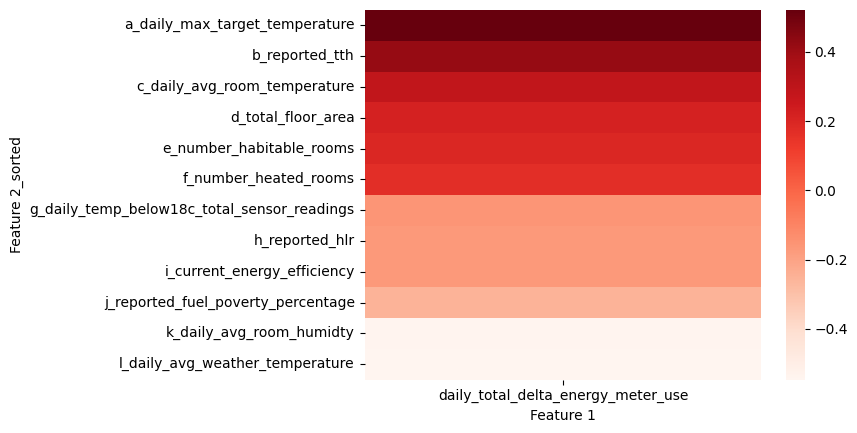

In [57]:
pivot_df = corr_df[corr_df['Feature 1'] == 'daily_total_delta_energy_meter_use'].pivot(index = 'Feature 1', columns = 'Feature 2_sorted', values = 'Correlation').T
sns.heatmap(pivot_df, cmap='Reds')

<Axes: xlabel='Feature 1', ylabel='Feature 2_sorted'>

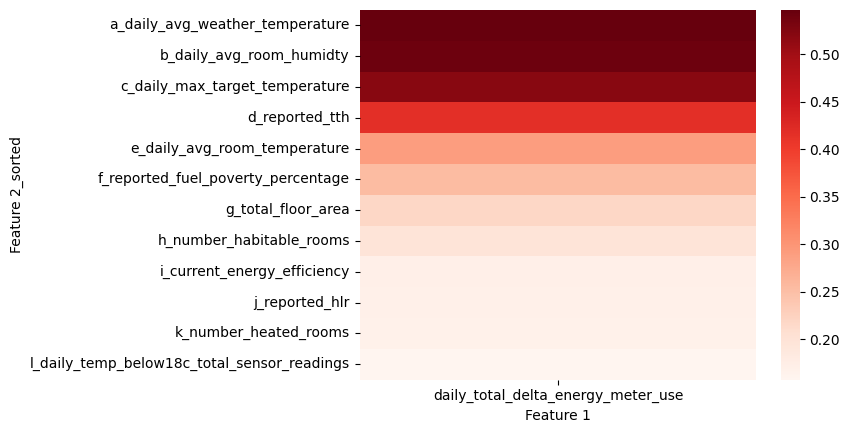

In [58]:
pivot_df = abs_corr_df[abs_corr_df['Feature 1'] == 'daily_total_delta_energy_meter_use'].pivot(index = 'Feature 1', columns = 'Feature 2_sorted', values = 'Correlation').T
sns.heatmap(pivot_df, cmap='Reds')

In [66]:
weather_humid_df = pd.read_csv('../raw_data/pmd_weather_humidity_energy_use.csv')

In [67]:
wh_corr = weather_humid_df.select_dtypes(exclude = 'object').corr()